<img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Pablo Slavkin

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin((2\pi.f_0 . k/f_s + \phi_0)),\space\space \forall k \in \Bbb{Z} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Para generar esta señales se creo una clase 'signal_generator_class' que permite generarlas parametricamente, y otra plase plotter_class para formatear los graficos:


In [1]:
import numpy as np                                                                             
                                                                                               
class signal_generator_class:                                                                  
    def __init__(self):                                                                        
        pass                                                                                   
                                                                                               
    # funcion que recibe: fs frecuencia de sampleo, fo es la frec que quiero                   
    # para la senusoide A es la amplitud N el numero de muestras as tomar sim,                 
    # punto de simetria (conde esta el vertice                                                 
    def signal_triangular(self, fs, fo, A, N , sim):                                           
        #inicializo para todos los samples que voy a tener                                     
        tt =   [n/fs  for n in range(N)]                                                       
        ans=[0 for i in range(N)]                                                              
        for i in range(N):                                                                     
            #calculo el porcentaje actual en funcion de i, y usando modulo para                
            #ir repitiendo cuando llego a la fo                                                
            percent=(tt[i]%(1/fo))/(1/fo) * 100                                                
            #si me paso de lo pedido...                                                        
            if percent < sim:                                                                  
                ans[i]=A/sim * percent                                                         
            else:                                                                              
                ans[i]=A-(A/(100-sim) * (percent-sim))                                         
        return ans, tt                                                                         
                                                                                               
                                                                                               
    # funcion que recibe: fs frecuencia de sampleo, fo es la frec que quiero                   
    # para la senusoide A es la amplitud N el numero de muestras as tomar                      
    # cilco,  PWM en porcentaje                                                                
    def signal_quad(self, fs, fo, A, N , ciclo):                                               
        #vector de N elementos, y aprovecho a cargarle la Amplitud negativa                    
        tt = [n/fs  for n in range(N)]                                                         
        ans=[-A for i in range(N)]                                                             
        for i in range(N):                                                                     
        #    #calculo para cada muestra en que parte del PWM estoy                             
            percent=(tt[i]%(1/fo))/(1/fo) * 100                                                
            #si me paso de lo pedido...pongo el valor positivo.                                
            if percent < ciclo:                                                                
                ans[i]=A                                                                       
        return ans, tt                                                                         
                                                                                               
    # funcion que recibe: fs frecuencia de sampleo, fo es la frec que quiero                   
    # para la senusoide A es la amplitud N el numero de muestras as tomar fase,                
    # la fase en radianes                                                                      
    def signal_sin(self, fs, fo, A, N , rad):                                                  
        #con esta magia greo un vector con N valores del seno de fo capturados                 
        #una distancia de 1/fs cada uno. Aplico %1 para que no arrastre error de pi a medida  
        #que el factor multiplicativo se hace mas grande.. como es periodica en 2*pi aprovecho eso
        tt =   [n/fs  for n in range(N)]                                                       
        ans =  [A * np.sin( 2 * np.pi * fo * (tt[n]%1) + rad) for n in range(N)]                   
        return ans, tt                                                                         
                                                                                               
    def signal_noise(self, fs, mean, deviation, N):                                            
        tt =   [n/fs  for n in range(N)]                                                       
        ans = np.random.normal(mean, deviation, N )                                            
        return ans, tt                                                                         
            
        
import matplotlib.pyplot as plt                                                                
                                                                                               
class plotter_class:                                                                           
                                                                                        
    def __init__(self,row,col):                                                                
        self.row=row                                                                           
        self.col=col                                                                           
        self.fig=plt.figure(figsize=( 10, 7))                                                  
        self.ax1=self.fig.add_subplot(row,col,1)                                               
        plt.tight_layout(pad=4, w_pad=5, h_pad=6)                                              
        plt.draw()                                                                             
                                                                                               
    def plot_signal(self, pos, x, y, title, xLabel, yLabel, about='', trace='.'):                            
        ax=self.fig.add_subplot(self.row,self.col,pos)                                         
        line, =ax.plot(x,y,trace, label=about)                                                 
        ax.set_title(title)                                                                    
        ax.set_xlabel(xLabel)                                                                  
        ax.set_ylabel(yLabel)                                                                  
        ax.grid(which='both', axis='both')                                                     
        if about != '':
            ax.legend(loc='best')                                                                  
        plt.draw()                                                                             
                                                                                               
    def plot_show(self):                                                                       
        plt.show()                                                                             
                                                                                               
    def plot_draw(self,pause):                                                                 
        plt.draw()                                                                             
        plt.pause(pause)                                                                       
                                                                                               
    def plot_close(self):                                                                      
        plt.close()                                                                            
                                                                                               
# NO modifiques este bloque,
############################
N  = 1000 # muestras
fs = 1000 # Hz
sg= signal_generator_class()
        
 

a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


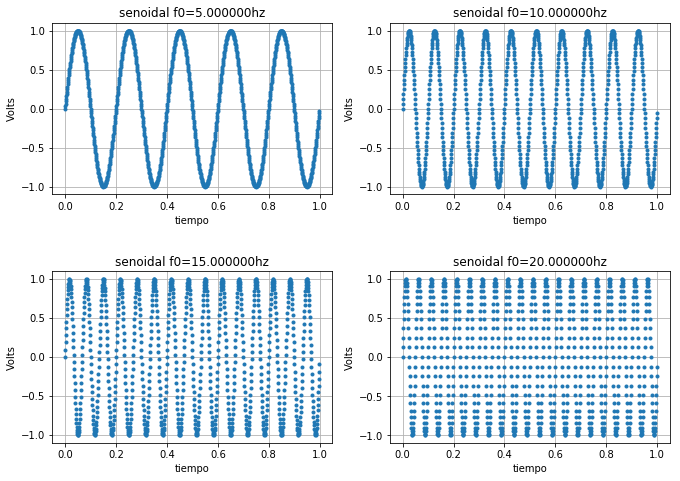

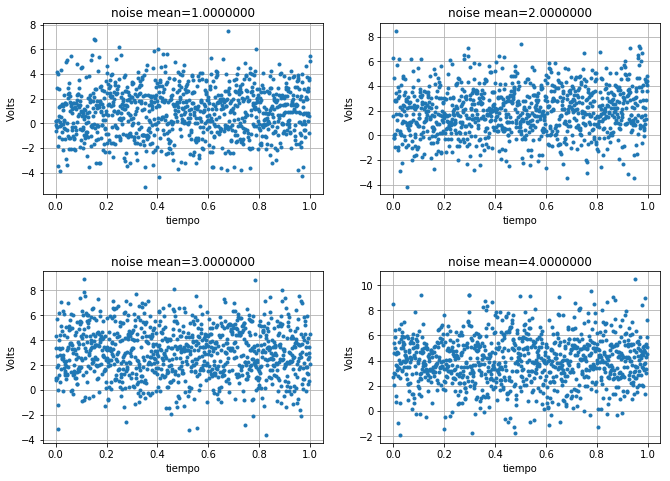

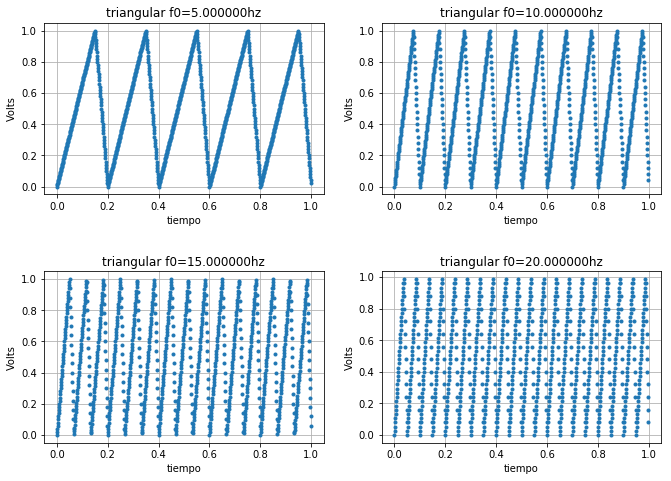

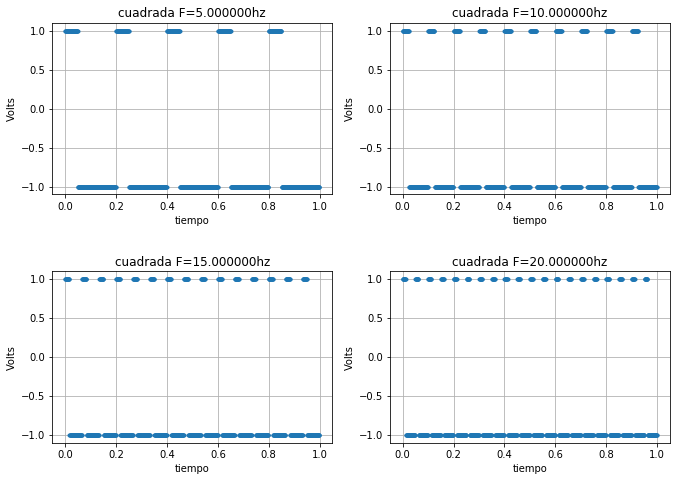

In [2]:
# Insertar aquí el código para inicializar tu notebook
########################################################
a0 = 1       # Volts                                                                           
p0 = np.pi/2 # radianes                                                                        
f0 = fs/2    # Hz 

plg1= plotter_class(2,2)                                                                        
for f0 in range(5,21,5):                                                                       
    ans,tt=sg.signal_sin(fs ,f0 ,a0 ,N ,0 )                                                    
    plg1.plot_signal (f0/5,tt,ans,'senoidal f0=%fhz' %f0 ,'tiempo' ,'Volts')           
                                                                                               
plg2= plotter_class(2,2)                                                                        
for M in range(1,5,1):                                                                         
    ans,tt=sg.signal_noise(fs, M ,2 ,N)                                                        
    plg2.plot_signal (M,tt,ans,'noise mean=%f0' %M ,'tiempo' ,'Volts')                    
                                                                                               
plg3= plotter_class(2,2)                                                                        
for f0 in range(5,21,5):                                                                       
    ans,tt=sg.signal_triangular(fs, f0, a0, N, 75)                                             
    plg3.plot_signal (f0/5,tt,ans,'triangular f0=%fhz' %f0 ,'tiempo' ,'Volts')       
                                                                                               
plg4= plotter_class(2,2)                                                                        
for F in range(5,21,5):                                                                        
    ans,tt=sg.signal_quad(fs, F, a0, N, 25)                                                    
    plg4.plot_signal (F/5,tt,ans,'cuadrada F=%fhz' %F ,'tiempo' ,'Volts')              


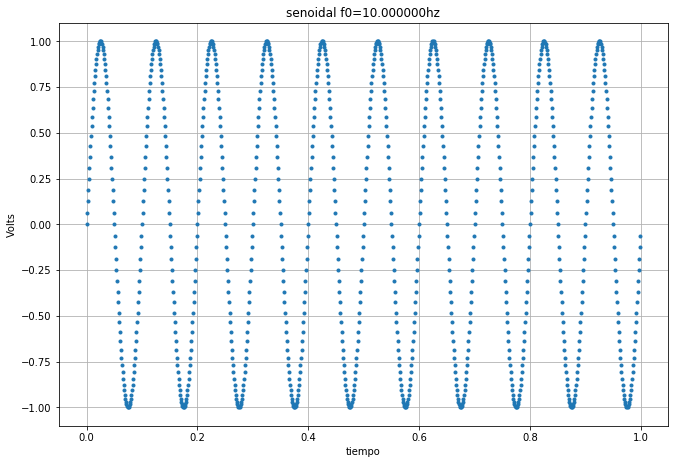

In [3]:
##################                                                                         
# a.1) Senoidal #                                                                          
#################                                                                          
a0 = 1 # Volts                                                                             
p0 = 0 # radianes                                                                          
f0 = 10   # Hz                                                                             
                                                                                               
# Insertar aquí el código para generar y visualizar la señal                               
##############################################################        
                                                                                               
pl1= plotter_class(1,1)                                                                        
ans,tt=sg.signal_sin(fs ,f0 ,a0 ,N , p0 )                                                 
pl1.plot_signal (1,tt,ans,'senoidal f0=%fhz' %f0 ,'tiempo' ,'Volts')                  



¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> A primera vista parece trivial determinar la frecuencia segun su representacion, pero debido a que es una senal sampleada, podria tratarse de una frecuencia alias. Para poder determinar certeramente la frecuencia, habria que garantizar que el seampleo se realizo luego de filtrar la senial con un filtro antialias.
 </div>

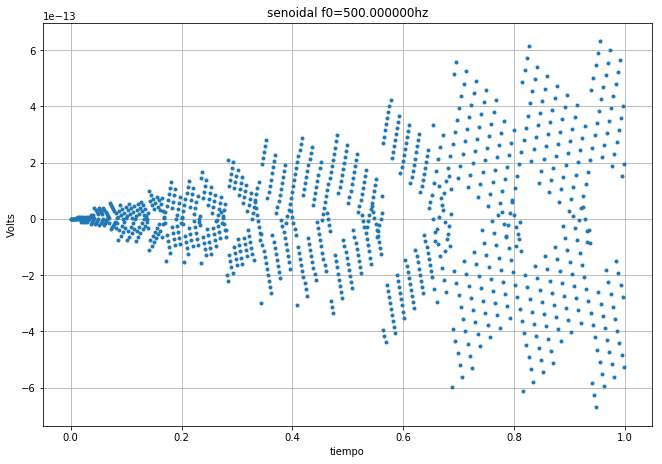

In [4]:
##################
# a.2) Senoidal #
#################
a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

pl2= plotter_class(1,1)                                                                        
ans,tt=sg.signal_sin(fs ,f0 ,a0 ,N , p0 )                                                 
pl2.plot_signal (1,tt,ans,'senoidal f0=%fhz' %f0 ,'tiempo' ,'Volts')                  



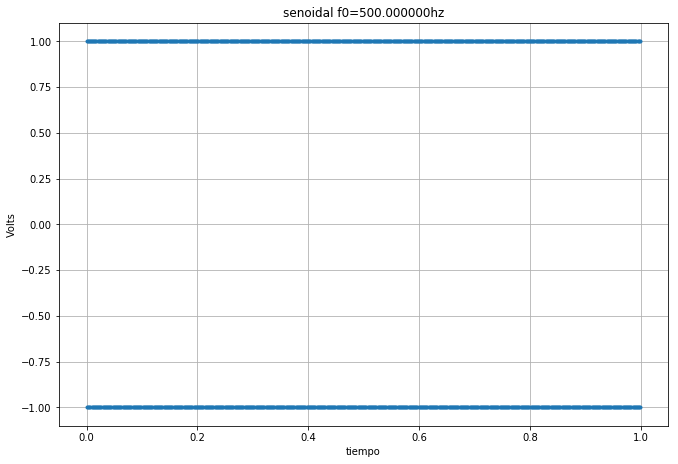

In [5]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

pl3= plotter_class(1,1)                                                                        
ans,tt=sg.signal_sin(fs ,f0 ,a0 ,N , p0 )                                                 
pl3.plot_signal (1,tt,ans,'senoidal f0=%fhz' %f0 ,'tiempo' ,'Volts')                  


¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 
    No, idem al punto a.1
    </div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 
    Como se explico en el punto a.1 hay infinitas senales que podrian representarse con estas figuras. En caso de que se garantizara que la senal fue sampleada luego de un filtro antialias ideal si seria perfectamente deducible.
    Por ej. en el caso de fo = fs/2, y todos los valores sampleados son cero (cercanos a cero en la grafica por la imprecision de PI) o bien es una senoidal de fo que justo se semplea rigorosamente en cero cada 1/fs, o es una continua en cero. En el caso de a.3 como los valores son simetricos y en -1 y 1, la senial es una senoidas, de amplitud 1 y fo=fs/2. SI los valores no fueses simetricos, la amplitud tambien se podria calcular pero utilizando la ecuacion del seno en cada punto.
</div>

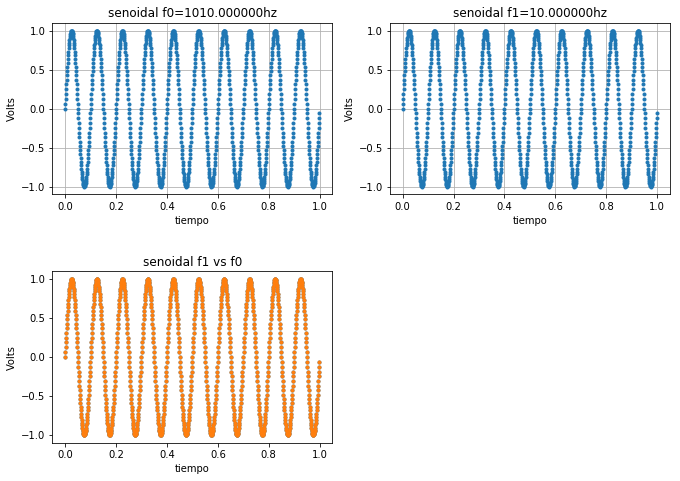

In [6]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

a1 = 1 # Volts                                                                             
p1 = 0 # radianes                                                                          
f1 = 10   # Hz                                                                             

# Insertar aquí el código para generar y visualizar la señal
##############################################################
pl4a= plotter_class(2,2)  

ans0,tt0=sg.signal_sin(fs ,f0 ,a0 ,N , p0 )                                                 
pl4a.plot_signal (1,tt0,ans0,'senoidal f0=%fhz' %f0 ,'tiempo' ,'Volts')

ans1,tt1=sg.signal_sin(fs ,f1 ,a1 ,N , p1 )
pl4a.plot_signal (2,tt1,ans1,'senoidal f1=%fhz' %f1 ,'tiempo' ,'Volts')

pl4a.plot_signal (3,tt0,ans0,'','tiempo' ,'a0')
pl4a.plot_signal (3,tt1,ans1,'senoidal f1 vs f0' ,'tiempo' ,'Volts')





¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> 
    Como se puede ver en la grafica superpuesta de a.1 y a.4 las 2 senales son indistinguibles. Una vez mas esto se debe a que fs no esta compliendo con Nyquist (fs/2>f0) y por lo tanto 1010 es un alias de 10hz.
    
    
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> para resolver la ambiguedad, solo basta con aumentar fs tal que como minimo fs/2>f0, en este caso 2020hz seria la frecuencia minima de sampleo. Se muestra dicho resultado en la siguiente figura con fs=3khz
</div>

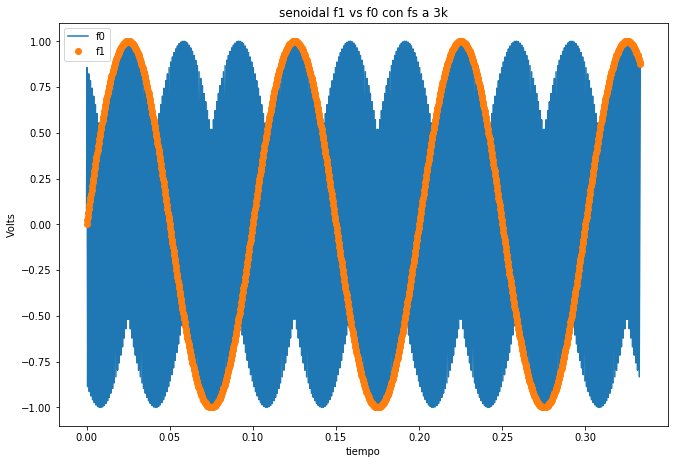

In [7]:
pl4b= plotter_class(1,1) 

ans0,tt0=sg.signal_sin(3000 ,1010 ,a0 ,int(N/1) , p0 )
ans1,tt1=sg.signal_sin(3000 ,10 ,a1 ,int(N/1) , p1 )
pl4b.plot_signal (1,tt0,ans0,'','' ,'' ,'f0','-')
pl4b.plot_signal (1,tt1,ans1,'senoidal f1 vs f0 con fs a 3k' ,'tiempo' ,'Volts' ,'f1','o')

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

<div class="alert alert-block alert-warning">
<b>Respuesta:</b>  Se implemento una class para agrupar algunas funciones relacionadas con el calculo de la dft y se muestran algunos ejemplos de su funcionamiento en las graficase: 
</div>

In [8]:
import numpy as np                                                                             
import scipy.fftpack as sc                                                                
                                                                                               
class dft_class:                                                                               
    def __init__(self):                                                                        
        pass                                                                                   
                                                                                               
    def dft_abs(self, fs, N, signal):                                                          
        freq = np.linspace(0, fs, N)                                                           
        return (2/N)*np.abs(sc.fft(signal))[:N//2], freq[:N//2]                                
                                                                                               
                                                                                               
    def dft_full(self, fs, N, signal):                                                         
        freq = np.linspace(0, fs, N)                                                           
        return (1/N)*np.abs(sc.fft(signal))[:N//1], freq[:N//1] 

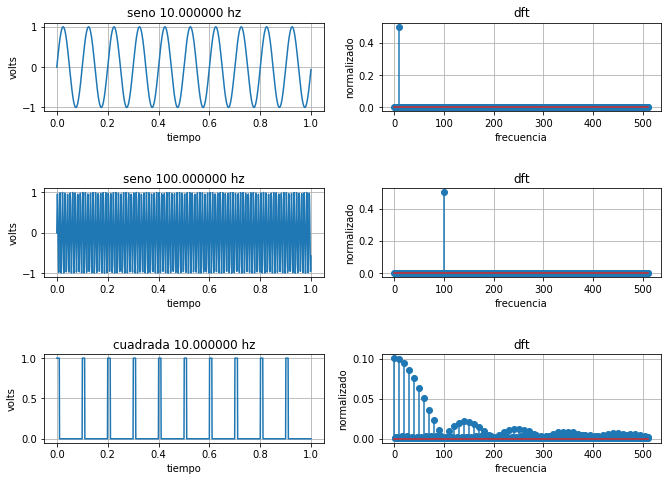

In [9]:
from plotter import * 
from signal_generator import *  
from dft import * 

N  = 1024                                                                                      
fs = 1024                                                                                      
a0 = 1       # Volts                                                                           
p0 = 0 # radianes                                                                              
f0 = 10   # Hz                                                                                 
                                                                                               
dft_c=dft_class()                                                                              
sg= signal_generator_class()                                                                   
                                                                                               
pl4= plotter_class(3,2)                                                                        
signal ,time  = sg.signal_sin ( fs ,f0 ,a0 ,N ,p0 )                                            
fft    ,freq  = dft_c.abs ( fs ,N  ,signal    );                                           
pl4.plot_signal ( 1 ,time ,signal ,'seno %f hz' %f0 ,'tiempo'     ,'volts' ,trace='-' )        
pl4.stem_signal ( 2 ,freq ,fft    ,'dft'  ,'frecuencia' ,'normalizado'      )                  
                                                                                               
                                                                                               
a0 = 1       # Volts                                                                           
p0 = 0 # radianes                                                                              
f0 = 100   # Hz                                                                                
                                                                                               
signal ,time  = sg.signal_sin ( fs ,f0 ,a0 ,N ,p0 )                                            
fft    ,freq  = dft_c.abs ( fs ,N  ,signal    );                                           
pl4.plot_signal ( 3 ,time ,signal ,'seno %f hz' %f0 ,'tiempo'     ,'volts' ,trace='-' )        
pl4.stem_signal ( 4 ,freq ,fft    ,'dft'  ,'frecuencia' ,'normalizado'      )                  


a0 = 1       # Volts                                                                           
p0 = 10    # % en 1                                                                             
f0 = 10   # Hz                                                                                 
                                                                                               
signal ,time  = sg.signal_quad ( fs ,f0 ,a0 ,N ,p0 )                                           
fft    ,freq  = dft_c.abs ( fs ,N  ,signal    );                                           
pl4.plot_signal ( 5 ,time ,signal ,'cuadrada %f hz' %f0 ,'tiempo'     ,'volts' ,trace='-' )    
pl4.stem_signal ( 6 ,freq ,fft    ,'dft'  ,'frecuencia' ,'normalizado'      )  
            

<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [10]:
from pandas import DataFrame
from IPython.display import HTML

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['--'], 
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   ['']  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['tiempo transcurrido (s)'],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df.to_html())


,tiempo transcurrido (s)
Tamaño de la señal N,--
16,
32,
64,
128,
256,
512,
1024,
2048,


<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


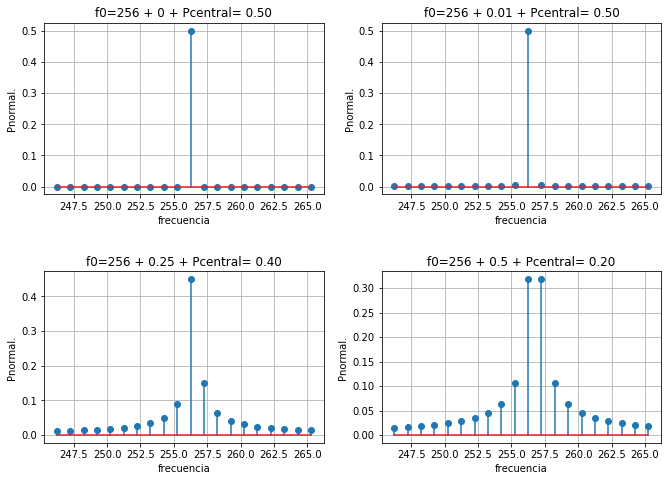

,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert^2$,$ \lvert X(f_0+1) \lvert ^2$,$ \sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,0.5,5.20813e-29,0
$f_S/4+0.01$,0.499834,5.10185e-05,0.000164472
$f_S/4+0.25$,0.404663,0.0452392,0.0948474
$f_S/4+0.5$,0.202641,0.202645,0.297359


In [11]:
from pandas import DataFrame
from IPython.display import HTML

import matplotlib.pyplot as plt                                                                
import numpy as np                                                                             
from plotter import *                                                                          
from signal_generator import *                                                                 
from dft import *                                                                              
                                                                                               
N  = 1024                                                                                      
fs = 1024                                                                                      
a0 = 1                                                                                         
p0 = 0                                                                                         
f0 = fs//4                                                                                     
                                                                                               
dft_c  = dft_class              (     )                                                        
sg     = signal_generator_class (     )                                                        
pl     = plotter_class          ( 2,2 )                                                        
offset = [0,0.01,0.25,0.5]                                                                     
graph  = 0;                                                                                    
ans    = [[0]*3 for i in range(4)]                                                             
                                                                                               
for D in offset :                                                                              
    signal ,time = sg.signal_sin ( fs ,f0+D ,a0 ,N ,p0 )                                       
    fft    ,freq = dft_c.abs     ( fs ,N  ,signal    );                                      
    label=f"f0={f0} + {D} + Pcentral= {dft_c.power_bin(fs,fft,f0):.2f}"                           
    pl.stem_signal ( graph+1 ,freq[f0-10:f0+10] ,fft[f0-10:f0+10]  ,label ,'frecuencia','Pnormal.')
    ans[graph][0] = dft_c.power_bin              (fs,fft,f0)                                         
    ans[graph][1] = dft_c.power_adjacent         (fs,fft,f0)                                         
    ans[graph][2] = dft_c.power_total_except_bin (fs,fft,f0)                                         
    graph+=1                                                                                   
pl.plot_show()                                                                                 
                                                                                               
                                                                                               
tus_resultados = [ ['$ \lvert X(f_0) \lvert^2$' ,                                                
    '$ \lvert X(f_0+1) \lvert ^2$' ,                                                             
    '$ \sum_{i=F} \lvert X(f_i) \lvert ^2 $'] ,                                                
    ['' ,'' ,'$F:f \neq f_0$'] , 
                  ans[0],
                  ans[1],
                  ans[2],
                  ans[3]
                 ]          

df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

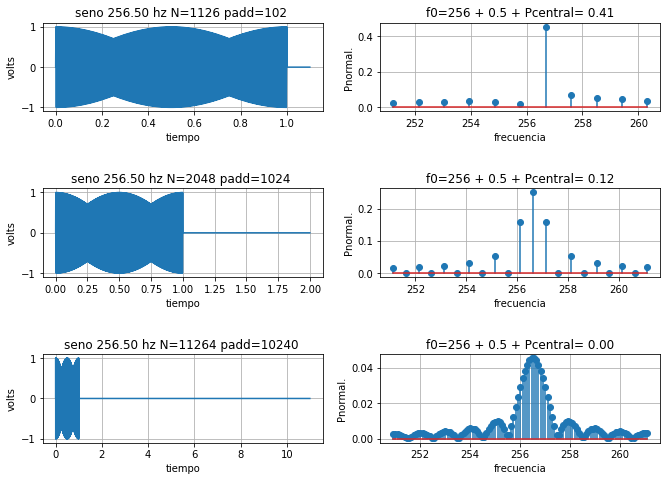

In [12]:
                                                                            
import matplotlib.pyplot as plt                                                                
import numpy as np                                                                             
from plotter import *                                                                          
from signal_generator import *                                                                 
from dft import *                                                                              
                                                                                               
N  = 1024                                                                                      
fs = 1024                                                                                      
a0 = 1                                                                                         
p0 = 0                                                                                         
f0 = fs//4                                                                                     
                                                                                               
D=0.5                                                                                          
dft_c  = dft_class              (     )                                                        
sg     = signal_generator_class (     )                                                        
pl     = plotter_class          ( 3,2 )                                                        
ZZeros = [N//10,N,N*10]                                                                        
graph  = 0;                                                                                    
ans    = [[0]*3 for i in ZZeros]                                                               
                                                                                               
                                                                                               
for zz in ZZeros :                                                                             
    signal ,time = sg.signal_sin_zero_padded ( fs ,f0+D ,a0 ,N ,p0, zz)                        
    fft    ,freq = dft_c.abs( fs ,N+zz  ,signal    );                                          
    pl.plot_signal ( graph*2+1 ,time ,signal ,'seno %.2f hz N=%d padd=%d ' %((f0+D),N+zz,zz) ,'tiempo'  ,'volts' ,trace='-' )
    label=f"f0={f0} + {D} + Pcentral= {dft_c.power_bin(fs,fft,f0+D):.2f}"                      
    bin    = int((f0*(N+zz))//fs)                                                              
    offset = (N+zz)//200                                                                       
    pl.stem_signal ( graph*2+2 ,freq[bin-offset:bin+offset+1],fft[bin-offset:bin+offset+1],label ,'frecuencia','Pnormal.')
    ans[graph][0] = dft_c.power_bin              ( fs, fft ,f0+D )                                     
    ans[graph][1] = dft_c.power_adjacent         ( fs, fft ,f0+D )                                     
    ans[graph][2] = dft_c.power_total_except_bin ( fs, fft ,f0+D )                                     
    graph+=1                                                                                   
pl.plot_show()   



**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No y No.  Leer punto 3d
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si definimos la resolucion en frecuencia como Fs/N donde N son las muestras de la senial sampleada NO INCLUYENDO los ceros agregados, dicha resolucion no ha cambiado en lo absoluto ya que no se cambio ni Fs ni N, sigue siendo exactamente de 1025/1024=1hz y se puede ver por los ceros de la sinc en la ultima fila de curvas de la figura 3b que estan espaciados cada 1hz.
    Sin embargo lo que si cambio es la resolucion de la fft. Esta resolucion viene dada por la cantidad de puntos que tiene la fft. 
    Antes de agregar ceros, esta resolucion tenia N puntos, pero luego, por ejemplo al agregar 10*N ceros, la resolucion paso de fs/N=1hz a fs/11N=0.09Hz. 
    Esta tecnica parmite entonces obtener una mejor interpolacion de los bins de la fft, principalmente cuando el contenido de frecuencias de la senial no es multiplo exacto de resolucion en frecuencia, como justamente se muestra en el ejemplo con una senoidal de fs/4 + 0.5= 256.5 para amplificar al maximo el efecto de spectral leakage.
        Se puede ver entonces como al agregar mas ceros se puede tener una mejor apoximacion del maximo en esa zona del espectro y estimar mejor la frecuencia de la senial. 
        En el caso sin ceros, como se ve en el apartado 3a, habria que aplicar algun promediado para poder estimarlo. Con lo ceros el promedido se hace cada vez mas evidente. 
</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [13]:
#######################################
# Tu simulación que genere resultados #
#######################################

import matplotlib.pyplot as plt                                                                
import numpy as np                                                                             
from plotter import *                                                                          
from signal_generator import *                                                                 
from dft import *                                                                              
                                                                                               
N  = 1024                                                                                      
fs = 1024                                                                                      
a0 = 1                                                                                         
p0 = 0                                                                                         
f0 = fs//4                                                                                     
                                                                                               
D=0.5                                                                                          
dft_c  = dft_class              (     )                                                        
sg     = signal_generator_class (     )                                                        
ZZeros = [0,N//10,N,N*10]                                                                        
graph  = 0;                                                                                    
ans    = np.zeros(4)                                                                           
                                                                                               
                                                                                               
for zz in ZZeros :                                                                             
    signal ,time  = sg.signal_sin_zero_padded ( fs ,f0+D ,a0 ,N ,p0, zz)                       
    fft    ,freq  = dft_c.abs( fs ,N+zz  ,signal    );                                         
    ans[graph]    = np.abs((dft_c.max_bin(fs, fft)-(f0+D)))*100/(f0+D)                         
    graph        += 1                                                                          
                                                                                               
tus_resultados = ans
                 
df = DataFrame(tus_resultados, columns=['$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())


,$e_\%$
0,0.194932
$N/10$,0.017658
$N$,0.000000
$10N$,0.017721


<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.a) Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

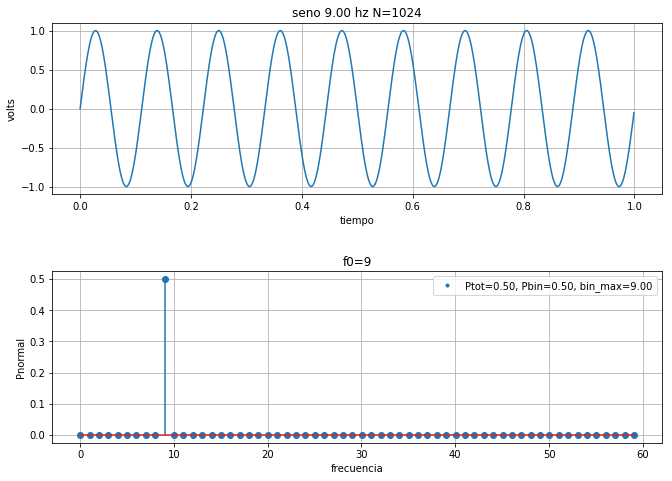

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.5,0.5,9
,,,
simulación,0.5,0.5,9


In [14]:
import matplotlib.pyplot as plt                                                                
import numpy as np                                                                             
from   plotter import *                                                                          
from   signal_generator import *                                                                 
from   dft import *                                                                              
                                                                                               
N  = 1024                                                                                      
fs = 1024                                                                                      
a0 = 1

dft_c  = dft_class              (     )
sg     = signal_generator_class (     )
pl     = plotter_class          ( 2,1 )
ans    = np.zeros(3)
                                                                                               
f0 = 9*fs//N                                                                                   
    
signal ,time = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N)                                     
fft    ,freq = dft_c.abs            ( fs ,N  ,signal      );                                   
pl.plot_signal ( 1 ,time ,signal ,'seno %.2f hz N=%d' %((f0),N) ,'tiempo'  ,'volts' ,trace='-' )
ans[0] = dft_c.power_total ( fs, fft ,f0 )                                                     
ans[1] = dft_c.power_bin   ( fs, fft ,f0 )                                                     
ans[2] = dft_c.max_bin     ( fs, fft     )                                                     
pl.stem_signal ( 2 ,freq,fft,f"f0={f0}",'frecuencia','Pnormal',f"Ptot={ans[0]:.2f}, Pbin={ans[1]:.2f}, bin_max={ans[2]:.2f}",center=ans[2],zoom=N//20)
pl.plot_show()

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['0.5', '0.5', '9'], # <-- completar acá
                  ['', '', ''], 
                 [ans[0],ans[1],ans[2]],
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Como es un tono puro en 9 * 1024/1024 = 9hz, era simple deducir que la fft hiba ser una delta en esa frecuencia y que toda la potencia estaria concentrada en esa unica delta. La potencia no me resulto tan simple porque me confundi con el '2' a tener en cuenta con las frecuencias negativas, y yo en los graficos muestro solo la mitad del espectro. De modo que la suma de los cuadrados de los bins mostrados en el grafico por 2 debe dar la energia completa del espectro. En este caso $0.5^2 * 2 = 0.5$
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.b) **1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

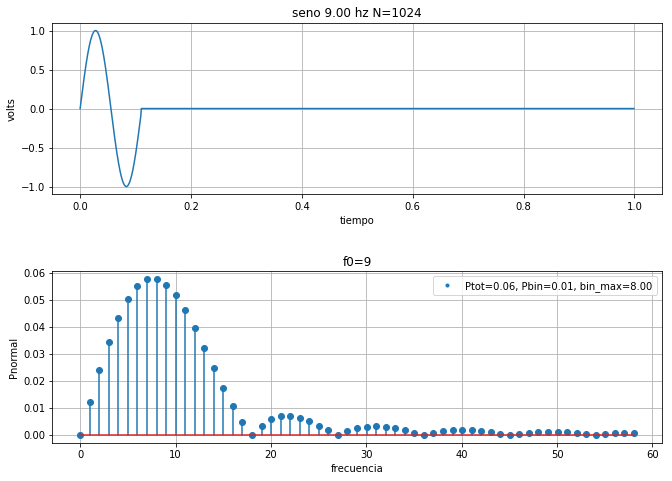

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.0555556,0.0555556,9
,,,
simulación,0.0555538,0.00617245,8


In [15]:
dft_c  = dft_class              (     )
sg     = signal_generator_class (     )
pl     = plotter_class          ( 2,1 )
ans    = np.zeros(3)
f0 = 9*fs//N                                                                                   
    
signal ,time = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N,0 , 1)                                     
fft    ,freq = dft_c.abs            ( fs ,N  ,signal      );                                   
pl.plot_signal ( 1 ,time ,signal ,'seno %.2f hz N=%d' %((f0),N) ,'tiempo'  ,'volts' ,trace='-' )
ans[0] = dft_c.power_total ( fs, fft ,f0 )                                                     
ans[1] = dft_c.power_bin   ( fs, fft ,f0 )                                                     
ans[2] = dft_c.max_bin     ( fs, fft     )                                                     
pl.stem_signal ( 2 ,freq,fft,f"f0={f0}",'frecuencia','Pnormal',f"Ptot={ans[0]:.2f}, Pbin={ans[1]:.2f}, bin_max={ans[2]:.2f}",center=ans[2],zoom=N//20)
pl.plot_show()

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [0.5/9, 0.5/9, '9'], # <-- completar acá
                  ['', '', ''], 
                 [ans[0],ans[1],ans[2]],
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


Observe el resultado y compare sus resultados con el punto anterior. ¿Qué ha cambiado? ¿Cuánto vale la energía de un solo ciclo de senoidal respecto al caso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Esta simulacion esta intimamente relacionada con la de zero-padding; eto hubiera sido equivalente a tomar un solo ciclo sampleado a 1024 y luego agregar zeros hasta completar N, entonces, la energia de f0 al no ser multiplo exacto de f0/N_Reducido, se desparrama en las frecuencias vecinas. Con lo cual en mi estimacion olvide tener en cuenta eso y solo dividi por 9. Sin embergo la estimacion de dividir por 9 la energia de un solo ciclo respecto de 9 coicidio perfectamente, y me base en el mas basico sentido comun, si 9 ciclos generan energia x, 1 generaran 1/9x. En cuanto a la estimacion del bin de maxima potencia, ahora con el desparramo, se acerca pero no da 9 exactamente. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.c) 1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

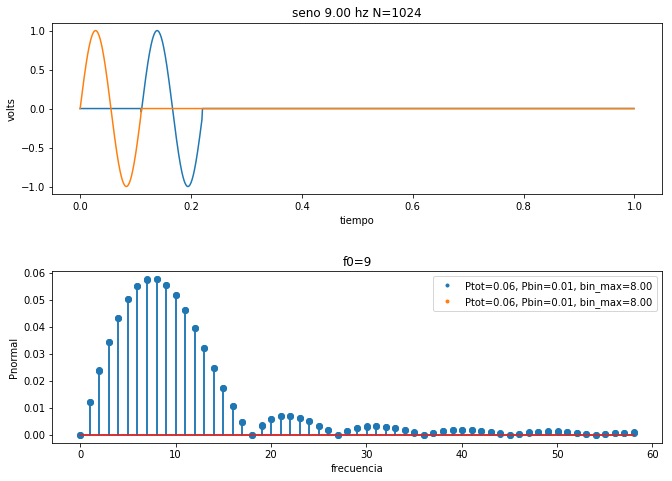

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.0555556,0.00555556,9
,,,
simulación,0.0555538,0.00617245,8


In [16]:
dft_c  = dft_class              (     )
sg     = signal_generator_class (     )
pl     = plotter_class          ( 2,1 )
ans    = np.zeros(3)
f0 = 9*fs//N                                                                                   
    
signal ,time = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N,1 , 1)                                     
fft    ,freq = dft_c.abs            ( fs ,N  ,signal      );                                   
pl.plot_signal ( 1 ,time ,signal ,'seno %.2f hz N=%d' %((f0),N) ,'tiempo'  ,'volts' ,trace='-' )
ans[0] = dft_c.power_total ( fs, fft ,f0 )                                                     
ans[1] = dft_c.power_bin   ( fs, fft ,f0 )                                                     
ans[2] = dft_c.max_bin     ( fs, fft     )                                                     
pl.stem_signal ( 2 ,freq,fft,f"f0={f0}",'frecuencia','Pnormal',f"Ptot={ans[0]:.2f}, Pbin={ans[1]:.2f}, bin_max={ans[2]:.2f}",center=ans[2],zoom=N//20)

signal ,time = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N,0 , 1)                                     
fft    ,freq = dft_c.abs            ( fs ,N  ,signal      );                                   
pl.plot_signal ( 1 ,time ,signal ,'seno %.2f hz N=%d' %((f0),N) ,'tiempo'  ,'volts' ,trace='-' )
ans[0] = dft_c.power_total ( fs, fft ,f0 )                                                     
ans[1] = dft_c.power_bin   ( fs, fft ,f0 )                                                     
ans[2] = dft_c.max_bin     ( fs, fft     )                                                     
pl.stem_signal ( 2 ,freq,fft,f"f0={f0}",'frecuencia','Pnormal',f"Ptot={ans[0]:.2f}, Pbin={ans[1]:.2f}, bin_max={ans[2]:.2f}",center=ans[2],zoom=N//20)
pl.plot_show()

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [0.5/9, 0.5/90, '9'], # <-- completar acá
                  ['', '', ''], 
                 [ans[0],ans[1],ans[2]],
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())

En este caso, ¿Qué ha cambiado respecto al anterior? ¿Cómo se manifiesta en el dominio frecuencial?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Nada!. No se manifiesta. Son identicas, Como se muestra en las figuras superpuestas tanto de la senial como del espectro
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.d) 1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

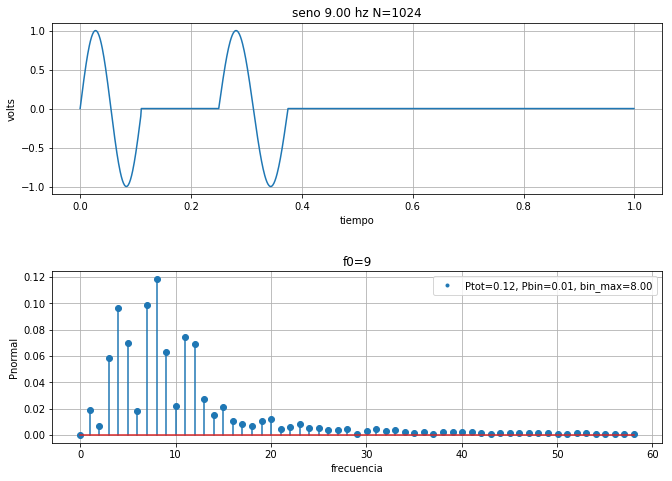

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.118056,0.0118056,8.5
,,,
simulación,0.118054,0.00786226,8


In [17]:
f0 = 9*fs//N                                                                                   
f1 = 8*fs//N                                                                                   
                                                                                               
dft_c  = dft_class              (     )                                                        
sg     = signal_generator_class (     )                                                        
pl     = plotter_class          ( 2,1 )                                                        
ans    = np.zeros(3)                                                                           
                                                                                               
signal  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N ,0 ,1)                                   
signal2 ,time  = sg.signal_sin_cycles ( fs ,f1 ,a0 ,N ,2 ,1)                                   
signal=signal+signal2                                                                          

fft    ,freq = dft_c.abs            ( fs ,N  ,signal      );                                   
pl.plot_signal ( 1 ,time ,signal  ,'seno %.2f hz N=%d' %((f0),N) ,'tiempo'  ,'volts' ,trace='-' )
ans[0] = dft_c.power_total ( fs, fft ,f0 )                                                     
ans[1] = dft_c.power_bin   ( fs, fft ,f0 )                                                     
ans[2] = dft_c.max_bin     ( fs, fft     )                                                     
                                                                                               
pl.stem_signal ( 2 ,freq,fft,f"f0={f0}",'frecuencia','Pnormal',f"Ptot={ans[0]:.2f}, Pbin={ans[1]:.2f}, bin_max={ans[2]:.2f}",center=ans[2],zoom=N//20)
pl.plot_show()                                                                                 
                
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [0.5/9+0.5/8, 0.5/90+0.5/80, 8.5], # <-- completar acá
                  ['', '', ''], 
                 [ans[0],ans[1],ans[2]],
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Puede localizar ambas componentes en este espectro? ¿Cómo lo haría?

<div class="alert alert-block alert-warning">
    <b>Respuesta:</b> Imposible!. Dado que la resolucion en frecuencia es de 1hz (fs/N) deberia ser suficiente para resolver entre 8 y 9hz. Con lo cual bastaria con aumentar la resolucion de la fft por ejemplo usando la tecnica de zero-padding, como se muestra en la siguiente figura y se pueden apreciar los lubulos de 8 y 9, aunque con otros vecinos tambien. .
</div>

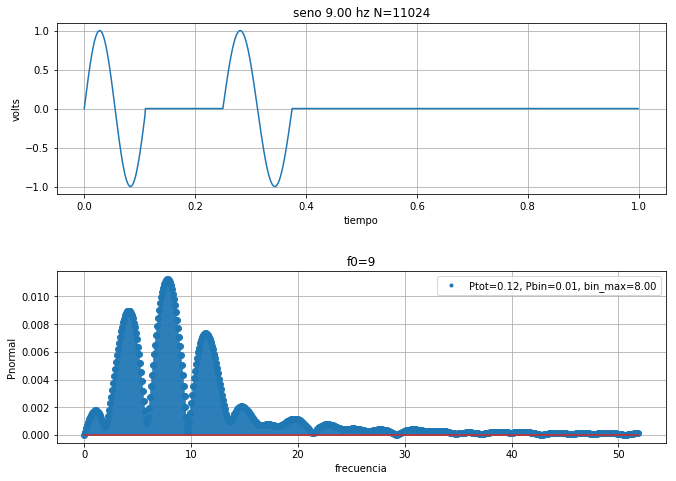

In [18]:
pl     = plotter_class          ( 2,1 )                                                        

                                                                                               
signal  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N ,0 ,1)                                   
signal2 ,time  = sg.signal_sin_cycles ( fs ,f1 ,a0 ,N ,2 ,1)                                   
signal=signal+signal2  

z=np.zeros(10000)                                                                              
N+=10000                                                                                       
signal=np.concatenate((signal,z),axis=0)  

fft    ,freq = dft_c.abs            ( fs ,N  ,signal      );                                   
pl.plot_signal ( 1 ,time ,signal  ,'seno %.2f hz N=%d' %((f0),N) ,'tiempo'  ,'volts' ,trace='-' )
pl.stem_signal ( 2 ,freq,fft,f"f0={f0}",'frecuencia','Pnormal',f"Ptot={ans[0]:.2f}, Pbin={ans[1]:.2f}, bin_max={ans[2]:.2f}",center=ans[2],zoom=N//20)
pl.plot_show()                                                                                 


<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.e) Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

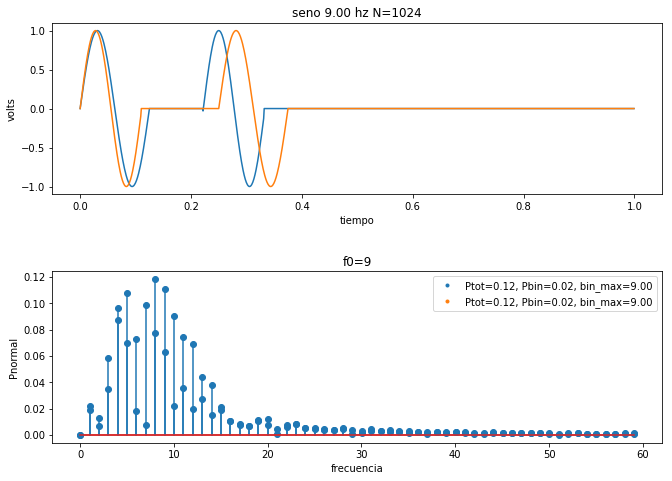

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.118056,0.0118056,8.5
,,,
simulación,0.118051,0.0245076,9


In [19]:
N  = 1024                                                                                      
fs = 1024                                                                                      
a0 = 1      

f0 = 9*fs//N                                                                                   
f1 = 8*fs//N                                                                                   
                                                                                               
dft_c  = dft_class              (     )                                                        
sg     = signal_generator_class (     )                                                        
pl     = plotter_class          ( 2,1 )                                                        
ans    = np.zeros(3)                                                                           
                                                                                               
signal  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N ,2 ,1)                                   
signal2 ,time  = sg.signal_sin_cycles ( fs ,f1 ,a0 ,N ,0 ,1)                                   
signal=signal+signal2                                                                          

fft    ,freq = dft_c.abs            ( fs ,N  ,signal      );                                   
pl.plot_signal ( 1 ,time ,signal  ,'seno %.2f hz N=%d' %((f0),N) ,'tiempo'  ,'volts' ,trace='-' )
ans[0] = dft_c.power_total ( fs, fft ,f0 )                                                     
ans[1] = dft_c.power_bin   ( fs, fft ,f0 )                                                     
ans[2] = dft_c.max_bin     ( fs, fft     )                                                     
                                                                                               
pl.stem_signal ( 2 ,freq,fft,f"f0={f0}",'frecuencia','Pnormal',f"Ptot={ans[0]:.2f}, Pbin={ans[1]:.2f}, bin_max={ans[2]:.2f}",center=ans[2],zoom=N//20)

signal3  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N ,0 ,1)                                   
signal4 ,time  = sg.signal_sin_cycles ( fs ,f1 ,a0 ,N ,2 ,1)                                   
signal3=signal3+signal4                                                                          

fft3    ,freq = dft_c.abs            ( fs ,N  ,signal3      );                                   
pl.plot_signal ( 1 ,time ,signal3  ,'seno %.2f hz N=%d' %((f0),N) ,'tiempo'  ,'volts' ,trace='-' )
pl.stem_signal ( 2 ,freq,fft3,f"f0={f0}",'frecuencia','Pnormal',f"Ptot={ans[0]:.2f}, Pbin={ans[1]:.2f}, bin_max={ans[2]:.2f}",center=ans[2],zoom=N//20)

pl.plot_show()                                                                                 
                
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [0.5/9+0.5/8, 0.5/90+0.5/80, 8.5], # <-- completar acá
                  ['', '', ''], 
                 [ans[0],ans[1],ans[2]],
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿ha cambiado el espectro respecto al caso anterior? ¿Si solo dispone del espectro, puede decir cuál ha ocurrido antes? ¿Resulta útil el análisis de espectral mediante la transformada de Fourier en este caso?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Como se puede ver en la superposicion de graficos, el espectro es identico en ambos casos, de modo que es imposible determinar cual de los dos ciclos vino primero, siendo inutil la fft para esta distincion
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.f) Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

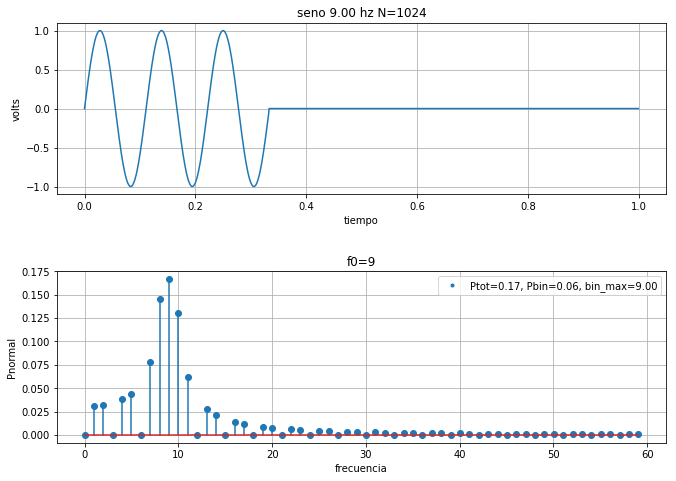

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.166667,0.166667,9
,,,
simulación,0.166666,0.0555553,9


In [20]:

from pandas import DataFrame
from IPython.display import HTML

import matplotlib.pyplot as plt                                                                
import numpy as np                                                                             
from plotter import *                                                                          
from signal_generator import *                                                                 
from dft import *                                                                              
                                                                                               
N  = 1024                                                                                      
fs = 1024                                                                                      
a0 = 1                                                                                         

f0 = 9*fs//N                                                                                   
                                                                                               
dft_c  = dft_class              (     )                                                        
sg     = signal_generator_class (     )                                                        
pl     = plotter_class          ( 2,1 )                                                        
ans    = np.zeros(3)                                                                           
                                                                                               
signal  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N ,0 ,3)                                   

fft    ,freq = dft_c.abs            ( fs ,N  ,signal      );                                   
pl.plot_signal ( 1 ,time ,signal  ,'seno %.2f hz N=%d' %((f0),N) ,'tiempo'  ,'volts' ,trace='-' )
ans[0] = dft_c.power_total ( fs, fft ,f0 )                                                     
ans[1] = dft_c.power_bin   ( fs, fft ,f0 )                                                     
ans[2] = dft_c.max_bin     ( fs, fft     )                                                     
                                                                                               
pl.stem_signal ( 2 ,freq,fft,f"f0={f0}",'frecuencia','Pnormal',f"Ptot={ans[0]:.2f}, Pbin={ans[1]:.2f}, bin_max={ans[2]:.2f}",center=ans[2],zoom=N//20)
pl.plot_show()                                                                                 
                
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [0.5/9*3, 0.5/9*3, 9], # <-- completar acá
                  ['', '', ''], 
                 [ans[0],ans[1],ans[2]],
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())



¿Qué energía tiene la componente $f_0$ en el espectro en comparación con la señal donde los 9 ciclos estaban presentes? ¿Y respecto a la que solo había 1 ciclo?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La relacion entre la energia en f0 con 3 ciclos y con 9 ciclos es de $0.05/0.5=0.1$, practicamente un orden de magnitud. Y en comparacino con la de 1 solo ciclo la relacion da $0.05/0.006=8.3$, tambien cercano a 1 orden de magnitud, pero superior.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.g) Idem anterior, pero cada ciclo con amplitudes (1, 5, 3).</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

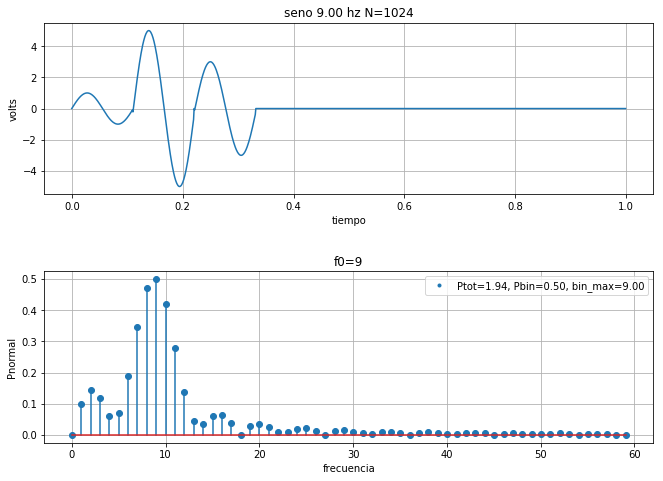

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1.94444,0,9
,,,
simulación,1.94424,0.499905,9


In [21]:
from pandas import DataFrame
from IPython.display import HTML

import matplotlib.pyplot as plt                                                                
import numpy as np                                                                             
from plotter import *                                                                          
from signal_generator import *                                                                 
from dft import *                                                                              
                                                                                               
N  = 1024                                                                                      
fs = 1024                                                                                      
a0 = 1
a1 = 5
a2 = 3

f0 = 9*fs//N                                                                                   
                                                                                               
dft_c  = dft_class              (     )                                                        
sg     = signal_generator_class (     )                                                        
pl     = plotter_class          ( 2,1 )                                                        
ans    = np.zeros(3)                                                                           
                                                                                               
signal0  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N ,0 ,1)                                   
signal1  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a1 ,N ,1 ,1)                                   
signal2  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a2 ,N ,2 ,1)                                   
signal=signal0+signal1+signal2


fft    ,freq = dft_c.abs            ( fs ,N  ,signal      );                                   
pl.plot_signal ( 1 ,time ,signal  ,'seno %.2f hz N=%d' %((f0),N) ,'tiempo'  ,'volts' ,trace='-' )
ans[0] = dft_c.power_total ( fs, fft ,f0 )                                                     
ans[1] = dft_c.power_bin   ( fs, fft ,f0 )                                                     
ans[2] = dft_c.max_bin     ( fs, fft     )                                                     
                                                                                               
pl.stem_signal ( 2 ,freq,fft,f"f0={f0}",'frecuencia','Pnormal',f"Ptot={ans[0]:.2f}, Pbin={ans[1]:.2f}, bin_max={ans[2]:.2f}",center=ans[2],zoom=N//20)
pl.plot_show()                                                                                 
                
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [0.5/9+4.5/9+12.5/9, 0, 9], # <-- completar acá
                  ['', '', ''], 
                 [ans[0],ans[1],ans[2]],
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())



¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Ahora la energia en f0 es como si tuviera los 9 ciclos, 0.5, mientras que en el inciso anterior era de 0.06
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.h) Idem patrón anterior, pero repetido 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

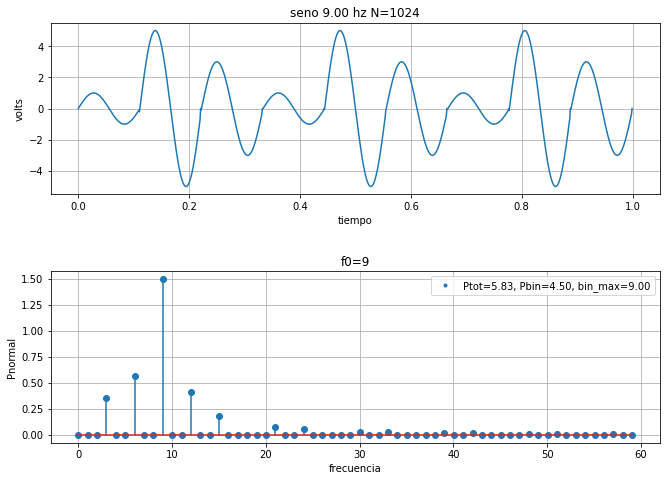

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,5.83333,0,9
,,,
simulación,5.83288,4.4993,9


In [22]:
from pandas import DataFrame
from IPython.display import HTML

import matplotlib.pyplot as plt                                                                
import numpy as np                                                                             
from plotter import *                                                                          
from signal_generator import *                                                                 
from dft import *                                                                              
                                                                                               
N  = 1024                                                                                      
fs = 1024                                                                                      
a0 = 1
a1 = 5
a2 = 3

f0 = 9*fs//N                                                                                   
                                                                                               
dft_c  = dft_class              (     )                                                        
sg     = signal_generator_class (     )                                                        
pl     = plotter_class          ( 2,1 )                                                        
ans    = np.zeros(3)                                                                           
                                                                                               
signal0  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N ,0 ,1)                                   
signal1  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a1 ,N ,1 ,1)                                   
signal2  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a2 ,N ,2 ,1) 
signal3  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N ,3 ,1)                                   
signal4  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a1 ,N ,4 ,1)                                   
signal5  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a2 ,N ,5 ,1) 
signal6  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N ,6 ,1)                                   
signal7  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a1 ,N ,7 ,1)                                   
signal8  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a2 ,N ,8 ,1) 

signal=signal0+signal1+signal2+signal3+signal4+signal5+signal6+signal7+signal8


fft    ,freq = dft_c.abs            ( fs ,N  ,signal      );                                   
pl.plot_signal ( 1 ,time ,signal  ,'seno %.2f hz N=%d' %((f0),N) ,'tiempo'  ,'volts' ,trace='-' )
ans[0] = dft_c.power_total ( fs, fft ,f0 )                                                     
ans[1] = dft_c.power_bin   ( fs, fft ,f0 )                                                     
ans[2] = dft_c.max_bin     ( fs, fft     )                                                     
                                                                                               
pl.stem_signal ( 2 ,freq,fft,f"f0={f0}",'frecuencia','Pnormal',f"Ptot={ans[0]:.2f}, Pbin={ans[1]:.2f}, bin_max={ans[2]:.2f}",center=ans[2],zoom=N//20)
pl.plot_show()                                                                                 
                
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [(0.5/9+4.5/9+12.5/9)*3, 0, 9], # <-- completar acá
                  ['', '', ''], 
                 [ans[0],ans[1],ans[2]],
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior? ¿Y respecto al que estaban los 9 ciclos presentes pero con la misma amplitud?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Como se ve en la figura, ahora la energia es de 5.5 mientras que en el inciso anteior era de 0.5 y con los 9 de igual amplitud 0.5
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.i) En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

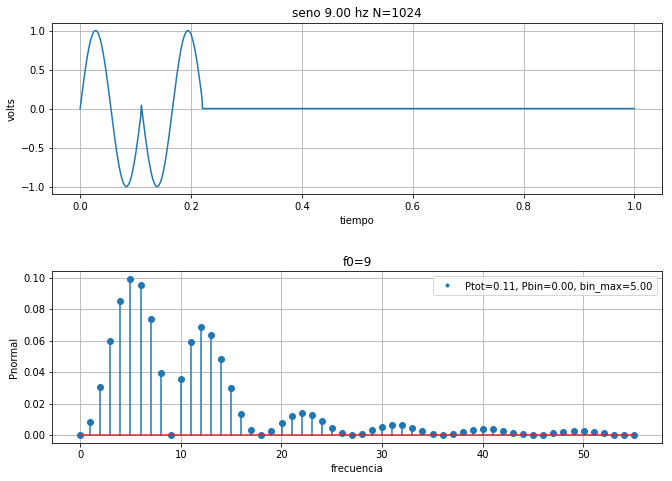

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.111111,0,9
,,,
simulación,0.111103,2.12816e-09,5


In [23]:
from pandas import DataFrame
from IPython.display import HTML

import matplotlib.pyplot as plt                                                                
import numpy as np                                                                             
from plotter import *                                                                          
from signal_generator import *                                                                 
from dft import *                                                                              
                                                                                               
N  = 1024                                                                                      
fs = 1024                                                                                      
a0 = 1

f0 = 9*fs//N                                                                                   
                                                                                               
dft_c  = dft_class              (     )                                                        
sg     = signal_generator_class (     )                                                        
pl     = plotter_class          ( 2,1 )                                                        
ans    = np.zeros(3)                                                                           
                                                                                               
signal0  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N ,0 ,1,phase=0)                                   
signal1  ,time  = sg.signal_sin_cycles ( fs ,f0 ,a0 ,N ,1 ,1,phase=np.pi)                                   

signal=signal0+signal1


fft    ,freq = dft_c.abs            ( fs ,N  ,signal      );                                   
pl.plot_signal ( 1 ,time ,signal  ,'seno %.2f hz N=%d' %((f0),N) ,'tiempo'  ,'volts' ,trace='-' )
ans[0] = dft_c.power_total ( fs, fft ,f0 )                                                     
ans[1] = dft_c.power_bin   ( fs, fft ,f0 )                                                     
ans[2] = dft_c.max_bin     ( fs, fft     )                                                     
                                                                                               
pl.stem_signal ( 2 ,freq,fft,f"f0={f0}",'frecuencia','Pnormal',f"Ptot={ans[0]:.2f}, Pbin={ans[1]:.2f}, bin_max={ans[2]:.2f}",center=ans[2],zoom=N//20)
pl.plot_show()                                                                                 
                
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [(0.5/9)*2, 0, 9], # <-- completar acá
                  ['', '', ''], 
                 [ans[0],ans[1],ans[2]],
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el que estaba un solo ciclo presente?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Ahora sorprendendemente la energia en f0 es practicamente cancelada
</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Energia: la fft si permite obtener la energia total de la senial con toda precision, pero en el caso de la energia de un solo componente o una banda, dependera de la relacion entre la banda que se desea medir, la resolucion espectral y la desintonia entre la fs y los tonos a medir para considerar integrar en dicha banda todo el derrame espectral de la senial y asi obtener una buena estimacion de energia. 
    En cuanto al contenido espectral es la herramienta adecuada siempre y cuando se respeten las restricciones de Nyquist en donde la fs > 2B, donde B es el tono de mayor frecuencia presente en la senial y la resolucion espectral es suficiente para discriminar entre el minimo entre dos tonos adyacentes. Dada estas restricciones es posible medir el contenido espectral con toda precision.
    La informacion de localizacion temporal de un componente, como se vio en varios ejemplos del TP, se pierde completamente en la fft, y no es posible determinarlo
    
</div>

<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

In [24]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
                   ['',                                             '',                                             ''                              ], 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

In [25]:
#####################################
# Tu simulación que genere gráficas #
#####################################


¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [26]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [27]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,,,
8 bits,,,
16 bits,,,


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 